https://www.kaggle.com/c/integer-sequence-learning

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = pd.read_csv('Sequences.csv')

In [3]:
data.head()

,Sequence
0,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,"1,111,12211,1343211,147753211,16252853211,1787..."


In [4]:
len(data)

227690

Train Dataset: 113845
    
Test Dataset: 113845    

In [5]:
data['Sequence'] = list(map(lambda x: list(map(int, x.split(','))), data['Sequence']))

In [6]:
data['Sequence'][0]

[1,
 3,
 13,
 87,
 1053,
 28576,
 2141733,
 508147108,
 402135275365,
 1073376057490373,
 9700385489355970183,
 298434346895322960005291,
 31479360095907908092817694945,
 11474377948948020660089085281068730]

In [7]:
data['Solved'] = ''

In [8]:
data['Length'] = data['Sequence'].progress_apply(len)

In [9]:
print('Max:', data['Length'].max())
print('99th:', data['Length'].quantile(0.99))
print('75th:', data['Length'].quantile(0.75))
print('Median:', data['Length'].median())
print('25th:', data['Length'].quantile(0.25))
print('1st:', data['Length'].quantile(0.01))
print('Min:', data['Length'].min())

Max: 348
99th: 105.0
75th: 58.0
Median: 34.0
25th: 18.0
1st: 4.0
Min: 1


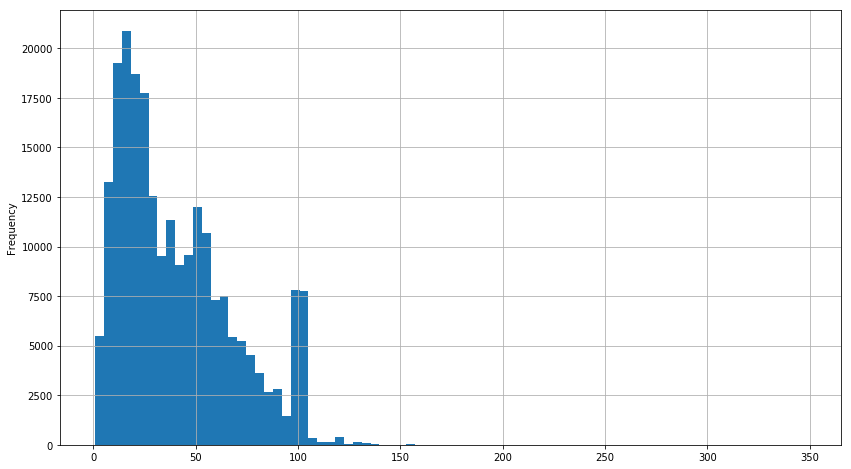

In [10]:
data['Length'].plot.hist(figsize=(14,8), grid=True, bins=80)

In [11]:
data

,Sequence,Solved,Length
0,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",,14
1,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",,57
2,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",,41
3,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",,20
4,"[1, 111, 12211, 1343211, 147753211, 1625285321...",,12
...,...,...,...
227685,"[0, 2, 6, 20, 72, 274, 1086, 4438, 18570, 7917...",,26
227686,"[1, 15, 208, 2389, 24845, 243697, 2348885, 228...",,15
227687,"[0, 0, 2, 3, 5, 7, 11, 13, 24, 30, 36, 46, 50,...",,57
227688,"[1, 3, 5, 9, 15, 25, 27, 45, 75, 81, 125, 135,...",,46


# Sequences

## Recurrence Relations

In [12]:
def checkRecurrence(seq, order= 2, minlength = 7):

    if len(seq)< max((2*order+1), minlength):
        return None
    
    # Set up the system of equations 
    A,b = [], []
    for i in range(order):
        A.append(seq[i:i+order])
        b.append(seq[i+order])
    A,b =np.array(A), np.array(b)
    try: 
        if np.linalg.det(A)==0:
            return None
    except TypeError:
        return None
   
    #  Solve for the coefficients (c0, c1, c2, ...)
    coeffs = np.linalg.inv(A).dot(b)  
    
    #  Check if the next terms satisfy recurrence relation
    for i in range(2*order, len(seq)):
        predict = np.sum(coeffs*np.array(seq[i-order:i]))
        if abs(predict-seq[i])>10**(-2):
            return None
    
    return list(coeffs)

In [13]:
def predictNextTerm_Recurrence(seq, coeffs):
    order = len(coeffs)
    predict = np.sum(coeffs*np.array(seq[-order:]))
    return int(round(predict))

### 2nd Order Sequences

In [14]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,2)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr2'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 3269 (1.44%)


### 3rd Order Sequences

In [15]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,3)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr3'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 3843 (1.69%)


### 4th Order Sequences

In [16]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,4)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr4'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 3307 (1.45%)


### 5th Order Sequences

In [17]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,5)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr5'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 2506 (1.1%)


### 6th Order Sequences

In [18]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,6)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr6'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 1752 (0.77%)


### 7th Order Sequences

In [19]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,7)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr7'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 1032 (0.45%)


### 8th Order Sequences

In [20]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,8)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr8'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 783 (0.34%)


### 9th Order Sequences

In [21]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,9)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr9'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 769 (0.34%)


### 10th Order Sequences

In [22]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkRecurrence(seq,10)
    if coeff:
        count += 1
        data['Solved'][i] = 'rr10'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 638 (0.28%)


## Polynomial Sequence

In [23]:
def checkPolynomial(seq, order= 2, minlength = 4):

    if len(seq)< max((2*order+1), minlength):
        return None
    
    # Set up the system of equations 
    A = [[i**j for j in range(order+1)] for i in range(order+1)]
    b = seq[:order+1]
    A,b =np.array(A), np.array(b)
    try: 
        if np.linalg.det(A)==0:
            return None
    except TypeError:
        return None
   
    #  Solve for the coefficients (c0, c1, c2, ...)
    coeffs = np.linalg.inv(A).dot(b)  
    
    #  Check if the next terms satisfy recurrence relation
    for i in range(order, len(seq)):
        predict = np.sum(coeffs*np.array([i**j for j in range(order+1)]))
        if abs(predict-seq[i])>10**(-2):
            return None
    
    return list(coeffs)

In [24]:
def predictNextTerm_Polynomial(seq, coeffs):
    order = len(coeffs)
    predict = np.sum(coeffs*np.array([i**j for j in range(order+1)]))
    return int(round(predict))

### 1st Order Sequence

In [25]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,1)
    if coeff:
        count += 1
        data['Solved'][i] = 'p1'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 618 (0.27%)


### 2nd Order Sequence

In [26]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,2)
    if coeff:
        count += 1
        data['Solved'][i] = 'p2'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 1901 (0.83%)


### 3rd Order Sequence

In [27]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,3)
    if coeff:
        count += 1
        data['Solved'][i] = 'p3'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 2642 (1.16%)


### 4th Order Sequence

In [28]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,4)
    if coeff:
        count += 1
        data['Solved'][i] = 'p4'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 3299 (1.45%)


### 5th Order Sequence

In [29]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,5)
    if coeff:
        count += 1
        data['Solved'][i] = 'p5'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 3668 (1.61%)


### 6th Order Sequence

In [30]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,6)
    if coeff:
        count += 1
        data['Solved'][i] = 'p6'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 4010 (1.76%)


### 7th Order Sequence

In [31]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,7)
    if coeff:
        count += 1
        data['Solved'][i] = 'p7'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 4084 (1.79%)


### 8th Order Sequence

In [32]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,8)
    if coeff:
        count += 1
        data['Solved'][i] = 'p8'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 4055 (1.78%)


### 9th Order Sequence

In [33]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,9)
    if coeff:
        count += 1
        data['Solved'][i] = 'p9'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 2978 (1.31%)


### 10th Order Sequence

In [34]:
count = 0
for i, seq in tqdm(enumerate(data['Sequence'])):
    coeff = checkPolynomial(seq,10)
    if coeff:
        count += 1
        data['Solved'][i] = 'p10'
        
print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Solved: 798 (0.35%)


# Final Standings

In [35]:
data['Solved'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

        91.75%
rr2      1.18%
rr3      1.12%
rr4      1.11%
p9       0.98%
rr5      0.81%
rr6      0.68%
p8       0.48%
rr7      0.44%
p10      0.35%
rr8      0.34%
rr9      0.33%
rr10     0.28%
p7       0.09%
p6       0.04%
p5       0.02%
p4       0.01%
p2       0.01%
p3        0.0%
p1        0.0%
Name: Solved, dtype: object